In [15]:
!pip install face_recognition

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import os
import cv2
import face_recognition
import pickle
from google.colab.patches import cv2_imshow

In [18]:
# Directory for known face images
folder_path = r"/content/drive/MyDrive/FACE_detect/Face_detection"

# Dictionary to hold encodings of known images
known_encodings = {}

# List all files in the folder
file_list = os.listdir(folder_path)
print(f"Files found in folder: {file_list}")

# Loop through the known face images in the folder and encode them
for file_name in file_list:
    # Construct the full file path
    file_path = os.path.join(folder_path, file_name)

    # Load the known face image
    known_image = face_recognition.load_image_file(file_path)

    # Find face encodings in the known image
    encodings = face_recognition.face_encodings(known_image)

    if encodings:
        # Assuming each image has only one face, use the first encoding
        # Remove file extension for labeling
        label = os.path.splitext(file_name)[0]
        known_encodings[label] = encodings[0]
    else:
        print(f"No face found in: {file_name}")

# Save the encodings to a file
with open("/content/drive/MyDrive/FACE_detect/known_encodings.pkl", "wb") as f:
    pickle.dump(known_encodings, f)

print("Encodings saved successfully.")

Files found in folder: ['obama.png', 'Trump.png', 'Elion Mask.png', 'ryan reynolds.png', 'Messi.png', 'C.Ronaldo.png', 'Jurgen club.png', 'neymar.png']
Encodings saved successfully.


Match found for Messi


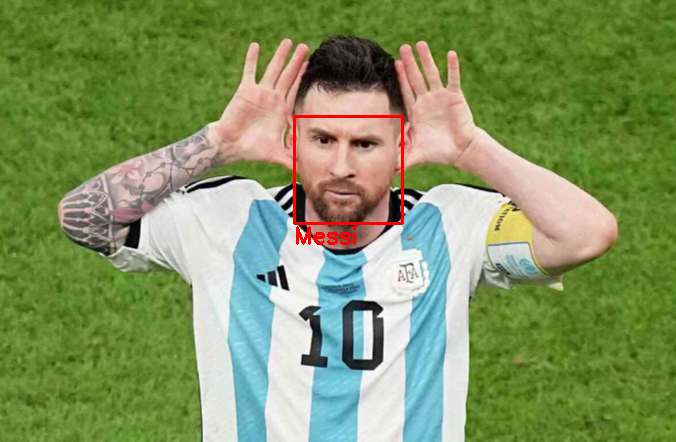

In [19]:
# Load the saved encodings from the file
with open("/content/drive/MyDrive/FACE_detect/known_encodings.pkl", "rb") as f:
    known_encodings = pickle.load(f)

# Specify the path to the image you want to check
check_image_path = r"/MEssii.png"
check_image = face_recognition.load_image_file(check_image_path)
check_encodings = face_recognition.face_encodings(check_image)

# Convert the image to OpenCV format (BGR) for drawing
check_image_cv = cv2.cvtColor(check_image, cv2.COLOR_RGB2BGR)

# Flag to track if any matches were found
match_found = False

# Loop through each detected face in the check image
for check_encoding in check_encodings:
    # Compare the encoding with all known encodings
    for label, known_encoding in known_encodings.items():
        matches = face_recognition.compare_faces([known_encoding], check_encoding)

        if True in matches:
            match_found = True
            print(f"Match found for {label}")

            # Find face location in the check image
            face_locations = face_recognition.face_locations(check_image)
            for (top, right, bottom, left) in face_locations:
                # Draw a rectangle around the face
                cv2.rectangle(check_image_cv, (left, top), (right, bottom), (0, 0, 255), 2)

                # Draw the label below the face
                cv2.putText(check_image_cv, label, (left, bottom + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)

            # Display the image with rectangles and labels
            cv2_imshow(check_image_cv)
            cv2.waitKey(0)  # Wait indefinitely for a key press
            break  # Stop checking further if a match is found, or remove this to check all faces

if not match_found:
    print("No match found.")

# Close all OpenCV windows (not necessary in Colab, but included for completeness)
cv2.destroyAllWindows()


In [20]:
import cv2
import face_recognition
from google.colab.patches import cv2_imshow
from IPython.display import Video
import pickle



# Specify the path to the video file you want to check
video_path = r"/content/Ronaldo_Nymar.mp4"
video_capture = cv2.VideoCapture(video_path)

# Define the codec and create VideoWriter object to save the output video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video_path = '/content/ronaldo_neymar_video.avi'
out = cv2.VideoWriter(output_video_path, fourcc, 20.0, (int(video_capture.get(3)), int(video_capture.get(4))))

# Process each frame of the video
while True:
    # Read a frame from the video
    ret, frame = video_capture.read()

    # Break the loop if no frame is returned (end of video)
    if not ret:
        break

    # Convert the frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Find all faces and face encodings in the frame
    face_locations = face_recognition.face_locations(rgb_frame)
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

    # Flag to track if any matches were found
    match_found = False

    # Loop through each detected face in the frame
    for face_encoding in face_encodings:
        # Compare the encoding with all known encodings
        for label, known_encoding in known_encodings.items():
            matches = face_recognition.compare_faces([known_encoding], face_encoding)

            if True in matches:
                match_found = True
                print(f"Match found for {label}")

                # Find face location in the frame
                for (top, right, bottom, left) in face_locations:
                    # Draw a rectangle around the face
                    cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

                    # Draw the label below the face
                    cv2.putText(frame, label, (left, bottom + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)

                # Break the inner loop if a match is found for the current face encoding
                break

    # Write the processed frame to the output video
    out.write(frame)

# Release video capture and writer objects
video_capture.release()
out.release()

# Close all OpenCV windows
cv2.destroyAllWindows()

# Display the saved video in Colab
Video(output_video_path)


Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for C.Ronaldo
Match found for neymar
Match found for neymar
Match found for neymar
Match found for neymar
Match found for neymar
Match found for neymar
Matc